In [1]:
#understanding and implementing k-means,hierarchical,and DBSCAN algorithms
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [4]:
#Load your dataset
#Assuming your dataset is stored in a Excel file named 'EastWestAirlines.csv'
data=pd.read_excel(r"C:\Users\belag\OneDrive\Desktop\DATA SCIENCE(13th Jan 2025 9.30 am, Ganashree)\Assighnments\Clustering\EastWestAirlines.xlsx"
                   ,sheet_name='data')

In [5]:
print(data)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [6]:
#data preprocessing
#handle missing values
data.dropna(inplace=True)

In [8]:
#remove outliers(you can use method suitable for your data)
#for example,you can use z_score method
from scipy import stats
z_scores=np.abs(stats.zscore(data))
data=data[(z_scores<3).all(axis=1)]

In [7]:
#scale the features if necessary
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

C:\Users\belag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


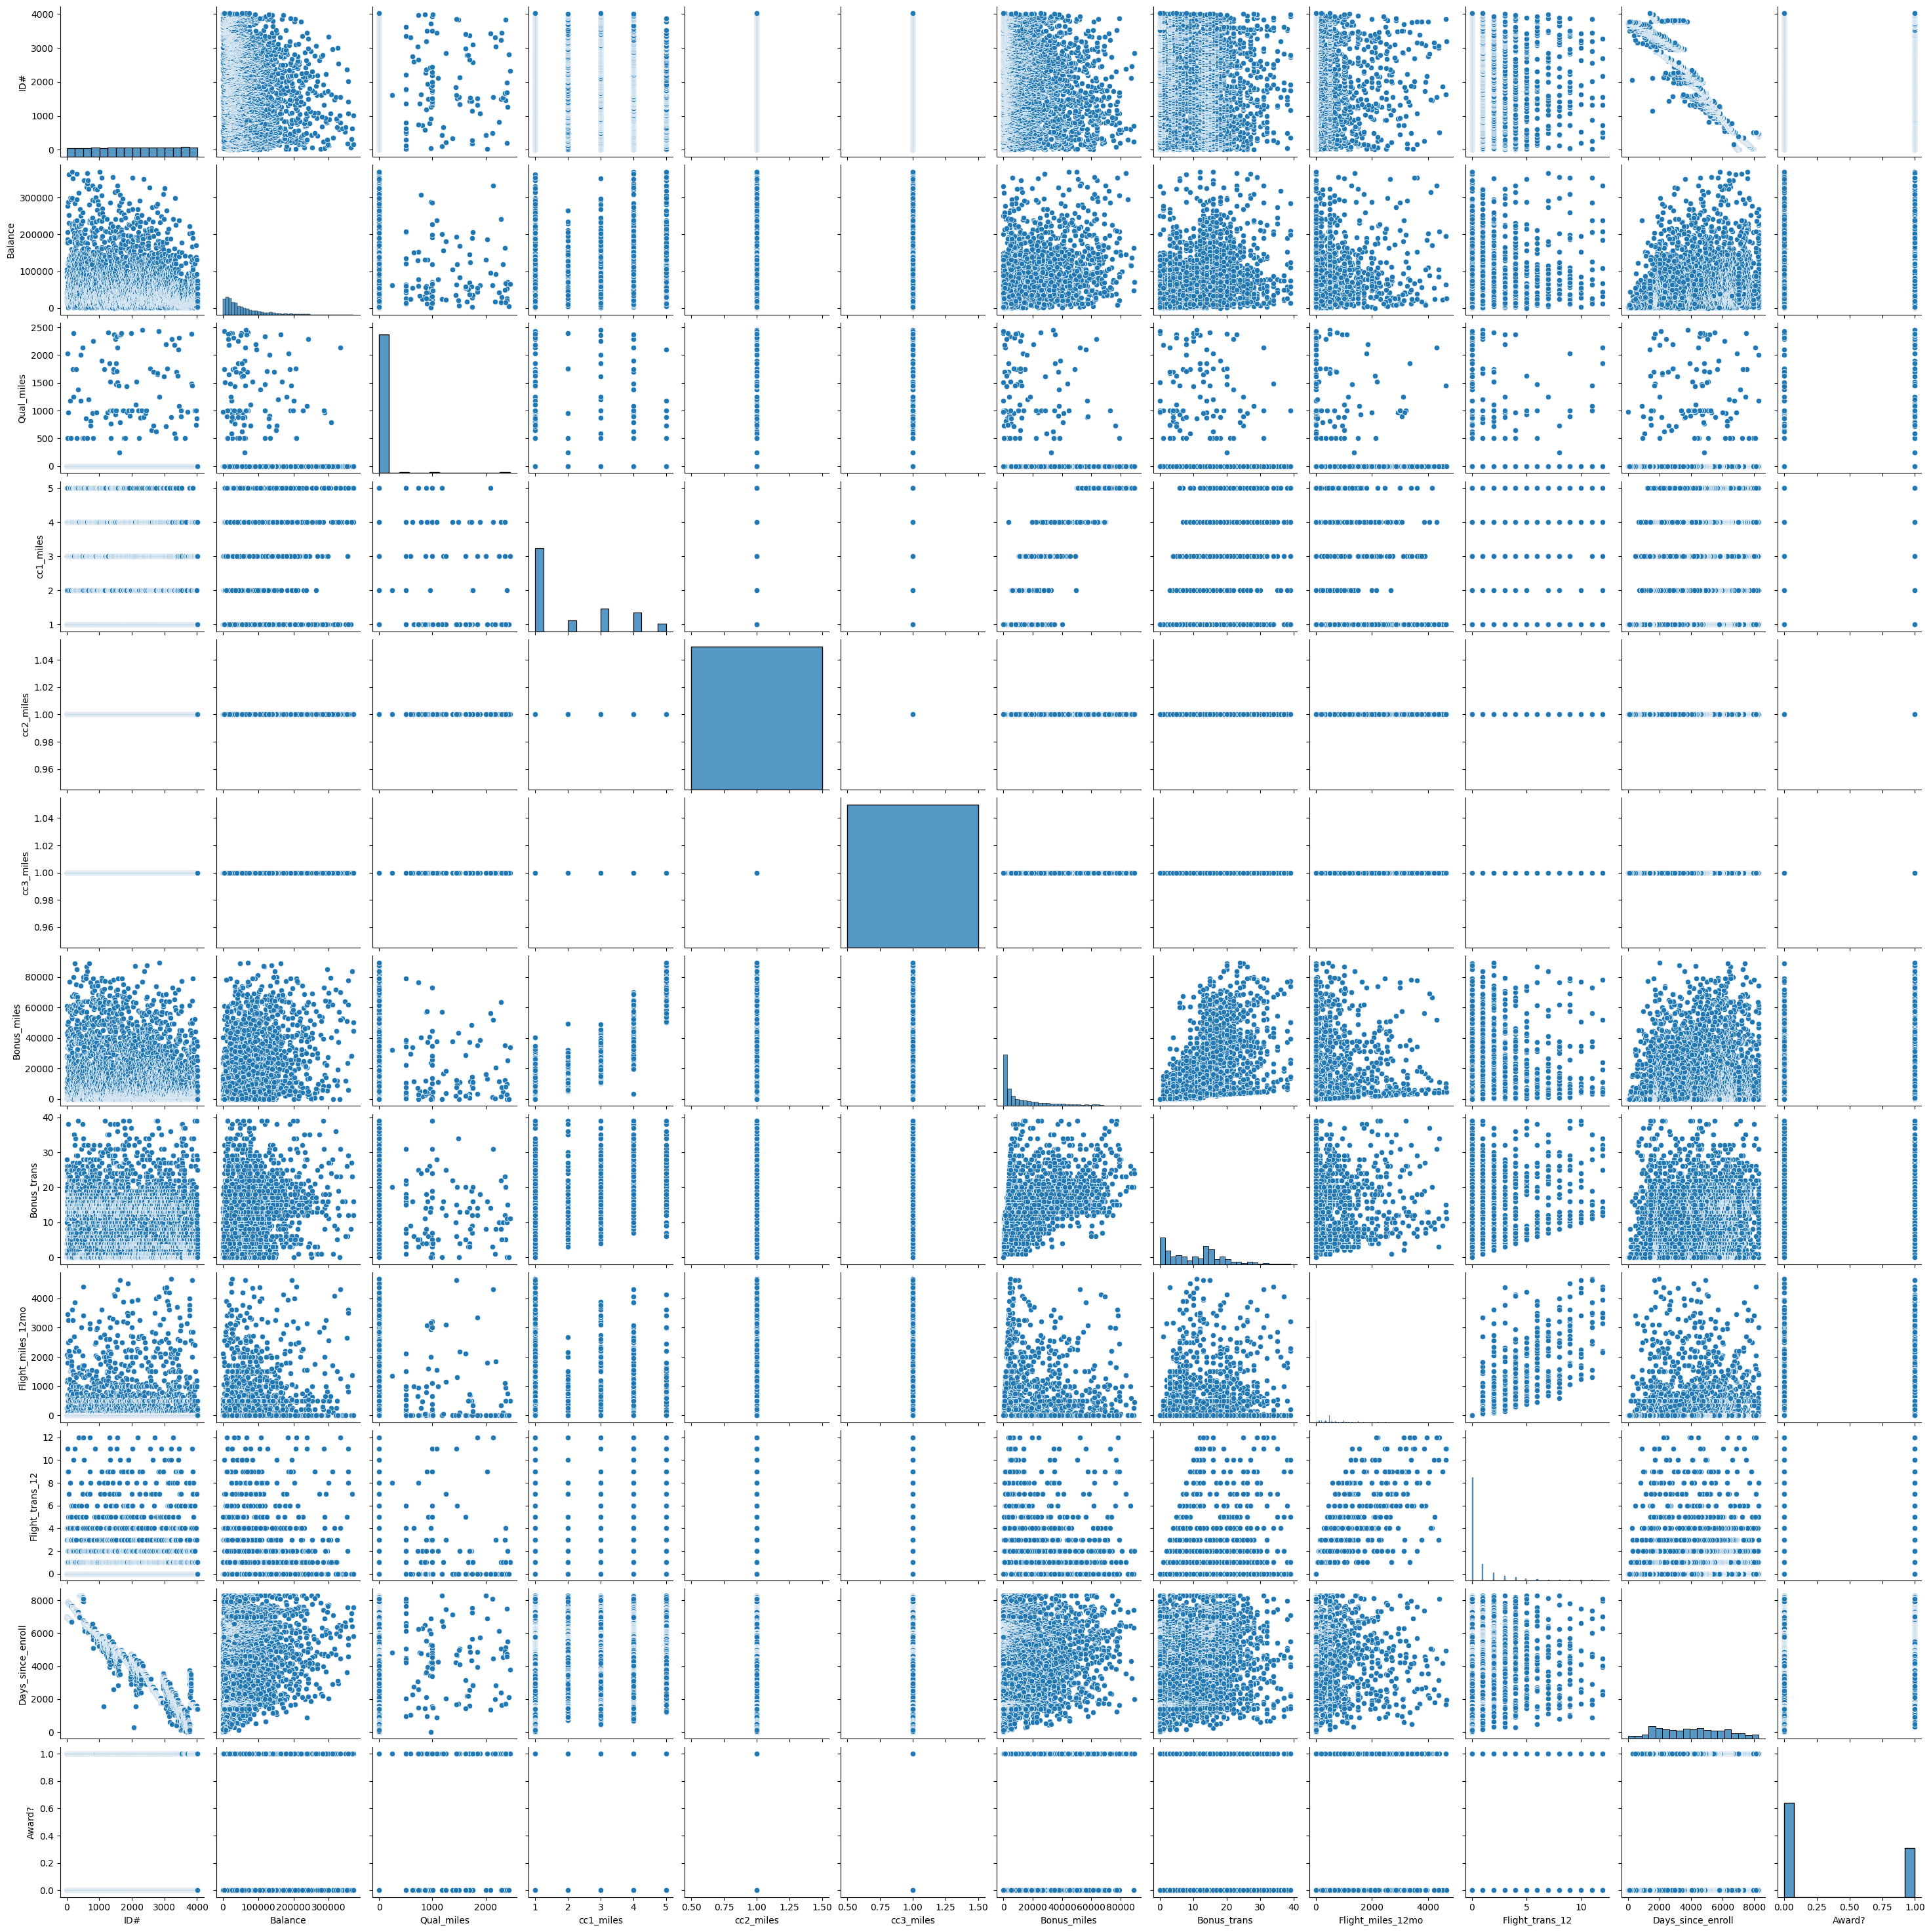

In [9]:
#perform exploratory data analysis(EDA)
#For example,you can use pairplot to visualize pairwise relationships
sns.pairplot(data)
plt.show()

In [11]:
#implementing clustering algorithms
#k-means
#find optimal number of clusters using the ELbow method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

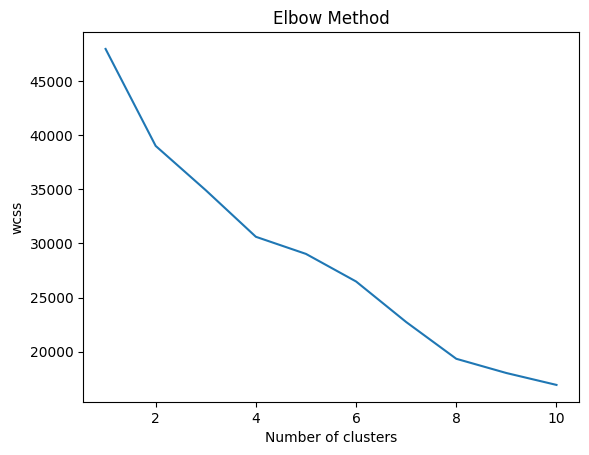

In [12]:
#plot the Elbow curve
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
#Based on the Elbow curve,choose the optimal number clusters and fit k-means
optimal_k=3#change this value based on the Elbow curve
kmeans=KMeans(n_clusters=optimal_k,init='k-means++',random_state=42)
kmeans.fit(scaled_data)
kmeans_labels=kmeans.labels_

In [14]:
#Hierarchical clustering
#we can choose the linkage criteria based on your data
agglomerative=AgglomerativeClustering(n_clusters=optimal_k,linkage='ward')
agglomerative_labels=agglomerative.fit_predict(scaled_data)

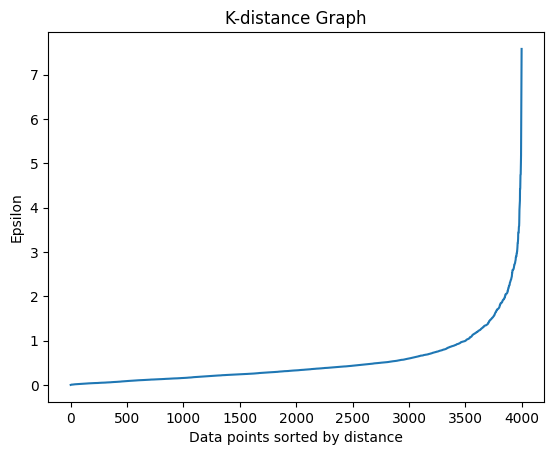

In [15]:
#DBSCAN
#Find optimal epsilon using NearestNeighbors
nn=NearestNeighbors(n_neighbors=2)
nn.fit(scaled_data)
distances,indices=nn.kneighbors(scaled_data)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [16]:
#Based on the k-distance graph,choose epsilon
epsilon=0.5
dbscan=DBSCAN(eps=epsilon,min_samples=5)
dbscan_labels=dbscan.fit_predict(scaled_data)

In [17]:
dbscan_labels

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

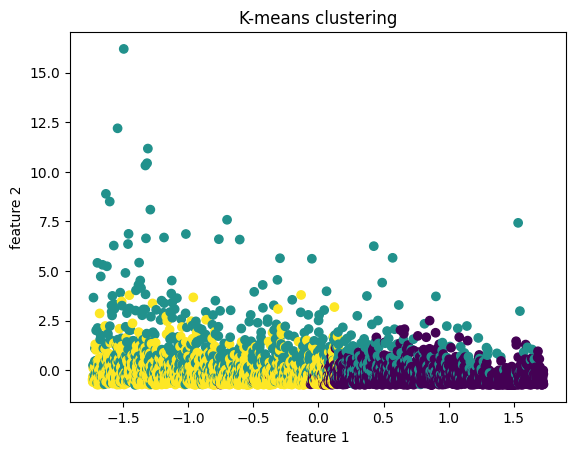

In [18]:
#Visualization
#plot the clusters using scatter plot
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=kmeans_labels,cmap='viridis')
plt.title('K-means clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [19]:
#Repeat the above process  for hierarchical clustering and DBSCAN
#Evaluation and performance metrics
#silhouette score for K-means
kmeans_silhouette_score=silhouette_score(scaled_data,kmeans_labels)
print("K-means silhouette score",kmeans_silhouette_score)

K-means silhouette score 0.201891717665419


In [20]:
#silhouette_score=silhouette_score(scaled_data,dbscan_labels)
dbscan_silhouette_score=silhouette_score(scaled_data,dbscan_labels)
print("DBSCAN silhouette score:",dbscan_silhouette_score)

DBSCAN silhouette score: -0.2823258834687895


In [21]:
cluster_centers=scaler.inverse_transform(kmeans.cluster_centers_)
for i,centroid in enumerate(cluster_centers):
    print(f"cluster{i+1}centroid:",centroid)

cluster1centroid: [3.10758124e+03 4.10851937e+04 1.08332925e+02 1.44328633e+00
 1.01655426e+00 1.00183936e+00 6.91149418e+03 8.12814224e+00
 2.37134887e+02 6.90374004e-01 2.20336052e+03 2.25015328e-01]
cluster2centroid: [1.53387293e+03 1.50218949e+05 2.97365702e+02 3.83367769e+00
 1.00723140e+00 1.04648760e+00 4.82495124e+04 2.16373967e+01
 1.19756818e+03 3.58987603e+00 4.98392562e+03 7.50000000e-01]
cluster3centroid: [1.07429214e+03 5.85070107e+04 7.98378571e+01 1.55071429e+00
 1.01714286e+00 1.00071429e+00 7.56004643e+03 8.71000000e+00
 2.09821429e+02 6.37142857e-01 5.75142714e+03 2.77142857e-01]


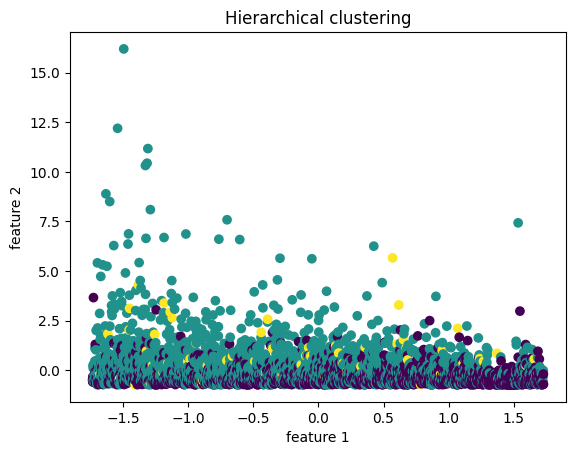

In [22]:
#Visualize hierarchical clustering 
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=agglomerative_labels,cmap='viridis')
plt.title('Hierarchical clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [23]:
#Visualize DBSCAN clustering
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=dbscan_labels,cmap='viridis')
plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [24]:
#silhouette score for hierarchical clustering
agglomerative_silhouette_score=silhouette_score(scaled_data,agglomerative_labels)
print("Hierarchical clustering silhouette score:",agglomerative_silhouette_score)

Hierarchical clustering silhouette score: 0.20526614352218822
